# Machine Learning Model Development


## 1 - Exploratory Data Analysis (EDA)


### Importing important libraries 

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from collections import Counter
%matplotlib inline

### Importing the CSV file

After importing all the important libraries, the first step is to import the dataset to work on.

In [2]:
birds = pd.read_csv('birdbones/bird.csv')  # Read CSV file

### Data observation by EDA

The data set is observed and exploratory data analysis is performed to get important information like distribution and imbalance in the data, and correlation bettween features.

In [3]:
np.shape(birds) #Checking the shape of birds data

(420, 12)

In [4]:
birds.head() #tabular representation of first five rows

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


The cell below will remove all the rows that have NA values in the dataset, because these rows are of no use to us in anyway. Also there are only 7 such rows so it does not effect the dataset as much.  

In [5]:
birds=birds.dropna(axis=0, how="any") #Removing the NA values
birds=birds.drop(['id'],axis=1)       #Removing id column as it is not important

In [6]:
np.shape(birds) # verify the new shape of data. Removed 7 columns.

(413, 11)

In [7]:
type(birds.type[1]) 
#Confirming the data types as seen in above table. probably need to do label encoding.

str

The above cell shows that the types of birds in the dataset are in string format. Best appoach is to change these into numerical labels. We would be using Label Encoding to do this.

In [8]:
type(birds.huml[1]) #Confirming the data types as seen in above table.

numpy.float64

The below cell shows all the important statistical information ofthe dataset. Important thing to notice is the mean values of the bone measues, and the standard deviations. These suggest that we should consider standardiziation of this dataset.(Will be discussed in preprocessing)

In [9]:
birds.describe() #Important stats observation of the data.

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,64.874867,4.381235,69.197409,3.606538,36.822446,3.221768,64.615642,3.182324,39.309806,2.944891
std,54.056078,2.861460,58.929490,2.190150,19.899356,2.021169,37.977929,2.084124,23.272704,2.194744
min,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,25.360000,2.200000,28.160000,1.870000,21.350000,1.720000,36.350000,1.560000,23.050000,1.430000
50%,44.180000,3.500000,43.710000,2.960000,31.090000,2.520000,51.880000,2.490000,31.740000,2.240000
75%,90.490000,5.820000,97.520000,4.770000,47.090000,4.110000,82.870000,4.250000,50.440000,3.520000
max,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


### Pie chart - percentage of each class of birds in the dataset

The pie chart below shows the distribution of dataset with respect to the types of the birds. This shows clear imbalance in the dataset as two of the classes make around 58% of data while other four, the remaining 42%.

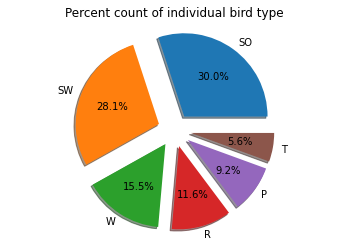

In [10]:
# Graphically represent the ecological bird types as a pie chart:
label=['SO','SW','W','R','P','T']
expld = 0.2*np.ones(6)
plt.pie(birds['type'].value_counts(), labels=label, explode=expld, shadow=True, autopct='%1.1f%%')
plt.title('Percent count of individual bird type')
plt.axis('equal')
plt.show()

In [11]:
columns = ['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw']
# The features of the birds bones

### Box plot - Relation of each bone measure with respect to each bird class

Another thing to observe is the trend of each bone measurement among different ecological classes of the birds to check if they are related to these measurements. This can be done by creating box plots between each bone measurement against each bird type. The results are interesting as they clearly show that the difference among the classes is very similar across the different bone measurements. The scansorial, singing and terrestrial birds have very small length and width of bones while the other three categories, raptors, swimming, and wading birds, have higher measure of bone length and width with greater variance. These results show high correlation between bone measurements and hence suggest classification method to solve this problem.

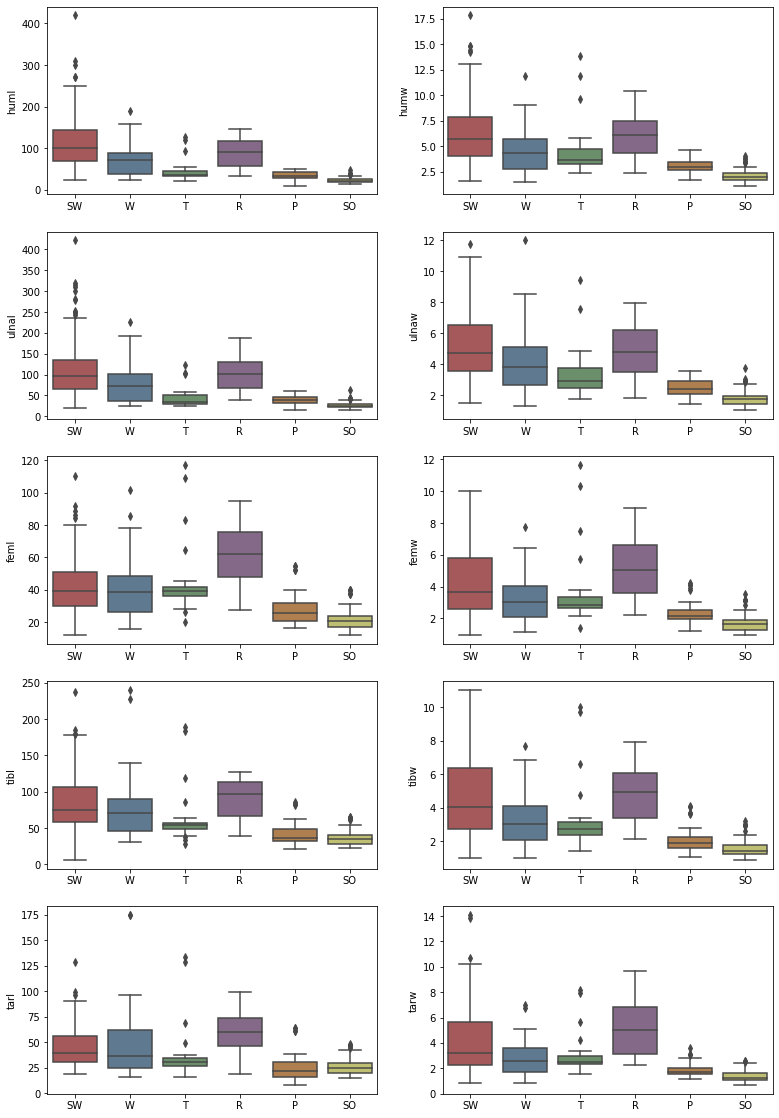

In [12]:
_, axes = plt.subplots(nrows=5, ncols=2, figsize=(13, 20))

for f, ax in zip(columns, axes.ravel()):
    _ = sns.boxplot(
        data=birds, 
        y=f, 
        x='type', 
        ax=ax, 
        palette=sns.color_palette("Set1", n_colors=6, desat=.5)
    )
    
    ax.set_xlabel("")

### Label encoding

The module LabelEncoder from Scikit Learn can be used to encode the bird types to numerical values.

In [13]:
label=LabelEncoder()
birds.type=label.fit_transform(birds.type)
birds.head() # The type of birds must be changed from  string type to encoded numbers. 

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,3
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,3
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,3
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,3
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,3


In [14]:
enc={
    'Original' : label.classes_,
    'Encoded'  : label.transform(label.classes_)
}
encoded=pd.DataFrame(enc)
encoded

,Original,Encoded
0,P,0
1,R,1
2,SO,2
3,SW,3
4,T,4
5,W,5


The cell above shows the encoded birds types.

## Removing outliers

To remove the outliers we will first separate ecah bird from the dataset and observe the datasets separately to see if any bone measurement is oddly big or small. Such rows will be removed as these are outliers. We have to do this as one type of bird might have different range of measuements than the other. 

### Bird type 0

In [15]:
bird_0 = birds[birds.type == 0]
bird_0.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,34.423947,3.039211,39.177368,2.476316,28.217368,2.307895,41.881316,2.095789,25.787368,1.902632,0.0
std,9.399708,0.631918,11.638906,0.580305,10.613094,0.803836,17.146487,0.801430,14.836621,0.573452,0.0
min,9.850000,1.730000,14.730000,1.410000,16.270000,1.210000,20.890000,1.050000,7.770000,1.160000,0.0
25%,28.697500,2.660000,31.962500,2.067500,20.640000,1.980000,31.970000,1.632500,15.822500,1.532500,0.0
50%,33.800000,2.930000,38.555000,2.415000,25.400000,2.135000,36.650000,1.885000,21.895000,1.740000,0.0
75%,42.305000,3.492500,47.305000,2.900000,31.857500,2.505000,49.235000,2.282500,30.540000,2.057500,0.0
max,49.120000,4.640000,60.950000,3.520000,54.670000,4.250000,85.880000,4.120000,63.910000,3.600000,0.0


We can see that there is unexpected increse in the max values from 75% values for the lengths of femur, tibia and tarsometatarsus. We need to examine these for outlier precence.


In [16]:
# quantile() will show the values with percentile higher than the assighned quntile number (0.9 in this case)
bird_0[bird_0.feml>bird_0.feml.quantile(0.9)] 

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
257,42.52,2.99,36.73,2.91,52.24,3.81,81.57,3.71,61.27,2.71,0
258,45.60,3.35,38.73,3.52,54.45,4.10,83.59,3.72,63.91,2.67,0
259,43.97,3.54,38.38,3.14,52.49,4.25,83.15,4.12,61.08,3.04,0
260,46.38,3.41,39.80,3.48,54.67,4.08,85.88,4.04,63.75,3.09,0


In [17]:
bird_0[bird_0.tarl>bird_0.tarl.quantile(0.9)]

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
257,42.52,2.99,36.73,2.91,52.24,3.81,81.57,3.71,61.27,2.71,0
258,45.60,3.35,38.73,3.52,54.45,4.10,83.59,3.72,63.91,2.67,0
259,43.97,3.54,38.38,3.14,52.49,4.25,83.15,4.12,61.08,3.04,0
260,46.38,3.41,39.80,3.48,54.67,4.08,85.88,4.04,63.75,3.09,0


4 values of feml are greater than 50 the temaining are in 30's. But these values sseem to be legitimate as the values for other two bones lengths are also big for these which suggest that these values might be true. We do not need to remove any row from type 0.

### Bird type 1

In [18]:
bird_1 = birds[birds.type == 1]
bird_1.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.0
mean,87.185000,6.057708,100.077917,4.793542,61.700625,5.235208,89.806875,4.926667,59.145000,5.10000,1.0
std,32.164088,2.193202,38.163946,1.661351,18.203526,1.877284,26.844907,1.716675,19.296233,2.03482,0.0
min,33.120000,2.400000,39.850000,1.800000,27.460000,2.190000,38.990000,2.150000,19.100000,2.22000,1.0
25%,57.462500,4.360000,66.927500,3.485000,47.645000,3.592500,65.997500,3.382500,46.235000,3.14250,1.0
50%,89.880000,6.125000,102.370000,4.745000,62.315000,5.060000,96.360000,4.935000,60.105000,5.03000,1.0
75%,116.520000,7.510000,129.542500,6.190000,75.745000,6.590000,113.797500,6.105000,73.455000,6.82500,1.0
max,145.000000,10.370000,188.000000,7.920000,94.790000,8.920000,126.540000,7.900000,99.720000,9.64000,1.0


There is noty much change in the values and there is a high chance that there are no outliers in this bird type aswell

### Bird type 2

In [19]:
bird_2 = birds[birds.type == 2]
bird_2.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.0
mean,22.442661,2.036935,26.479113,1.749355,21.371532,1.678790,36.165726,1.540726,25.865242,1.348387,2.0
std,6.156546,0.554944,6.975962,0.476863,6.055828,0.502955,9.689100,0.485779,7.489141,0.419664,0.0
min,12.690000,1.140000,14.090000,1.000000,11.830000,0.930000,22.130000,0.870000,15.190000,0.660000,2.0
25%,18.687500,1.670000,22.220000,1.400000,17.265000,1.287500,28.630000,1.220000,20.012500,1.050000,2.0
50%,21.750000,1.945000,25.720000,1.715000,20.735000,1.640000,35.330000,1.425000,24.310000,1.265000,2.0
75%,25.370000,2.320000,29.277500,1.962500,24.020000,1.910000,40.375000,1.775000,29.647500,1.602500,2.0
max,48.200000,4.080000,61.940000,3.750000,40.110000,3.510000,64.970000,3.210000,48.350000,2.570000,2.0


Similar to the previous types, there are no out liers in this type of bird

### Bird type 3

In [20]:
bird_3 = birds[birds.type == 3]
bird_3.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.0
mean,110.251121,6.423966,111.755517,5.221638,42.169655,4.275776,85.317069,4.513534,45.156207,4.149914,3.0
std,66.225024,3.283262,75.889706,2.346272,18.141428,2.151396,39.840920,2.309153,20.896670,2.677063,0.0
min,22.630000,1.630000,20.750000,1.510000,12.210000,0.970000,5.500000,1.010000,18.420000,0.830000,3.0
25%,68.412500,4.062500,65.687500,3.537500,29.967500,2.572500,57.587500,2.712500,30.125000,2.245000,3.0
50%,100.065000,5.735000,96.935000,4.685000,39.325000,3.660000,75.275000,4.035000,39.695000,3.225000,3.0
75%,143.500000,7.877500,133.750000,6.540000,51.020000,5.810000,106.030000,6.377500,56.137500,5.630000,3.0
max,420.000000,17.840000,422.000000,11.720000,110.540000,9.990000,237.000000,11.030000,128.350000,14.090000,3.0


In [21]:
bird_3[bird_3.huml>bird_3.huml.quantile(0.935)]

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
33,210.0,13.03,278.0,10.74,56.87,8.03,76.66,5.20,22.54,7.16,3
38,272.0,14.86,320.0,10.42,91.60,9.71,132.00,10.23,81.77,8.91,3
39,270.0,14.25,310.0,10.90,86.20,9.96,125.76,9.63,79.18,10.05,3
56,310.0,14.40,315.0,9.51,88.77,8.10,180.00,9.45,96.13,7.69,3
57,250.0,11.91,252.0,8.31,73.04,7.37,160.00,8.47,82.46,7.04,3
58,420.0,17.84,422.0,11.72,110.54,9.99,237.00,11.03,128.35,8.93,3
59,250.0,11.28,247.5,7.50,69.04,6.20,156.00,7.19,83.36,6.13,3
60,300.0,12.48,300.0,8.65,84.05,8.53,178.00,9.61,99.01,7.55,3


The bird type 3 shows a lot of increse in the values between 75% and max value. When these bones are observed separately, these show the presence of outliers which are shown by above datraframe. We will delete these rows from the datset. One way to do this, is to remove these rows from the each dataset and then combine all the datasets to the original form. The other (and easier) way is to note the row number, and just remove it from the original datset. 

In [22]:
outliers=bird_3[bird_3.huml>bird_3.huml.quantile(0.935)]
# The quantile value is selected by hit and trial method. We are looking for outliers between 75% and 100%. 
# As soon as we see a drastic change in the measurement, we delete the values after that quantile.

### Birds type 4

In [23]:
bird_4 = birds[birds.type == 4]
bird_4.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0
mean,45.699565,4.786087,45.617391,3.471739,46.277391,3.819565,66.090870,3.451739,40.086522,3.183913,4.0
std,28.068796,2.944815,27.230427,1.796931,24.507726,2.573380,41.865969,2.273169,30.708129,1.746846,0.0
min,20.250000,2.350000,25.140000,1.760000,20.170000,1.370000,27.670000,1.410000,15.680000,1.550000,4.0
25%,32.065000,3.290000,28.635000,2.430000,36.235000,2.645000,49.035000,2.380000,26.780000,2.340000,4.0
50%,34.240000,3.600000,35.240000,2.910000,39.380000,2.870000,53.770000,2.710000,31.000000,2.490000,4.0
75%,44.275000,4.715000,51.580000,3.765000,41.715000,3.365000,56.435000,3.155000,34.820000,2.945000,4.0
max,127.000000,13.790000,123.270000,9.420000,117.070000,11.640000,189.000000,10.030000,134.000000,8.190000,4.0


In [24]:
bird_4[bird_4.feml>bird_4.feml.quantile(0.9)]

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
197,92.82,9.60,100.58,7.57,82.94,7.47,118.24,6.61,69.16,5.66,4
201,118.75,11.90,104.68,4.77,108.85,10.29,183.00,9.69,134.00,7.96,4
202,127.00,13.79,123.27,9.42,117.07,11.64,189.00,10.03,128.50,8.19,4


The birds type 4 has the above outliers and will be stored in the outlier variable for deleting.

In [25]:
outliers=outliers.append(bird_4[bird_4.feml>bird_4.feml.quantile(0.9)])
# We also combine all the rows that have outliers in a separate data frame,
# so that we can use their index numbers to delete them from the actual dataset.

### Birds type 5

In [26]:
bird_5 = birds[birds.type == 5]
bird_5.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0
mean,73.081563,4.614844,77.965625,4.106719,40.119531,3.118594,76.290938,3.190156,47.635469,2.770625,5.0
std,38.139195,2.138560,46.897278,1.948194,17.655380,1.409339,41.382712,1.485697,31.617301,1.338460,0.0
min,22.390000,1.530000,24.160000,1.290000,15.710000,1.140000,30.310000,0.990000,15.800000,0.830000,5.0
25%,38.502500,2.780000,36.140000,2.615000,26.555000,2.075000,46.112500,2.060000,24.597500,1.707500,5.0
50%,70.470000,4.355000,72.785000,3.825000,38.410000,3.020000,71.245000,3.010000,36.940000,2.555000,5.0
75%,89.092500,5.677500,102.217500,5.077500,48.232500,4.042500,90.007500,4.120000,61.800000,3.585000,5.0
max,190.000000,11.920000,225.000000,12.000000,101.750000,7.750000,240.000000,7.710000,175.000000,7.000000,5.0


In [27]:
bird_5[bird_5.feml>bird_5.feml.quantile(0.96)]

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
116,157.00,9.00,192.00,7.02,85.60,6.44,227.0,6.84,175.00,6.77,5
117,190.00,11.92,225.00,8.55,101.75,7.75,240.0,7.71,175.00,7.00,5
120,118.52,6.87,134.91,5.06,78.20,5.24,132.0,5.38,85.28,4.74,5


In [28]:
outliers=outliers.append(bird_5[bird_5.feml>bird_5.feml.quantile(0.96)])

In [29]:
index=outliers.index # Getting the index of rows with outliers.

In [30]:
len(index)# We will be deleting 14 rows from the data set,  
          # 21 in total if we include the 7 rows with NA values that were deleted before.

14

In [31]:
np.shape(birds) # Shape before removing outliers

(413, 11)

#### Drop the rows with above indexes

In [32]:
birds.drop(index, axis=0, inplace=True) # Deleting the 14 rows with outliers.

In [33]:
np.shape(birds) #Checking the shape of birds data after outlier removal

(399, 11)

### Train-Test Split

For machine learning models, a standard practice is to separate a percentage of the data, usually 20%, for testing and using the remaining data for training, so that the model is tested on 'unseen' data to avoid biasness. In this task a module called **'train_test_split'** is used to dive the train and test data in 80-20 ratio. A random state is selected for the split which is helpful if the same results are to be recreated again. In this case a random state of 20 is used.
Moreover we need to do the split before balancing the the data and oversample only the train set so it does not bias the model.

In [34]:
columns = ['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(birds[columns],birds.type,
                                                    test_size=0.2, 
                                                    random_state=15)#test size is 20%, tain size is 80%.

### Balancing the data set

As we know now, the data is highly imbalanced. We need to oversample the data to balance it. This can be done using a module called imblearn and specifically the smote module.

In [36]:
X=X_train
Y=y_train
X_train,y_train=SMOTE().fit_resample(X,Y) # Calling the SMOTE function from Imbalance learn 

In [37]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train)))

Original dataset shape Counter({2: 97, 3: 89, 5: 52, 1: 37, 0: 27, 4: 17})
Resampled dataset shape Counter({3: 97, 0: 97, 5: 97, 1: 97, 4: 97, 2: 97})


### Bar graph - graphical representation of the balancing step

Text(0, 0.5, 'Frequency')

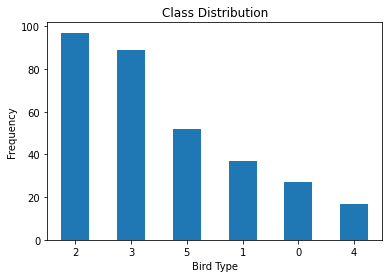

In [38]:
count_classes = pd.value_counts(Y, sort = True)
count_classes.plot(kind = 'bar', rot=0)         # Plotting the unbalanced dataset
plt.title("Class Distribution")
plt.xlabel("Bird Type")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

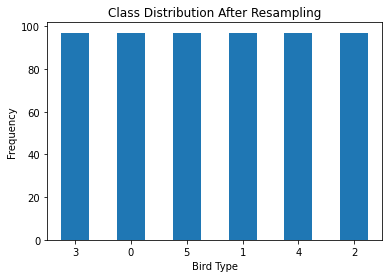

In [39]:
count_classes = pd.value_counts(y_train, sort = True)
count_classes.plot(kind = 'bar', rot=0)         # Plotting the balanced dataset
plt.title("Class Distribution After Resampling")
plt.xlabel("Bird Type")
plt.ylabel("Frequency")

### Heat map - Correlation check

An important thing is the relation between the bone features of different birds and see if they have any similarity or not. This can be done using a correlation matrix. A visual representation of the matrix in the form of a heat map is shown below. It is obvious from the heat map that the bones are highly related to each other and it also makes sense as big birds have large and wide bones and small birds have relatively smaller and less wide bones.

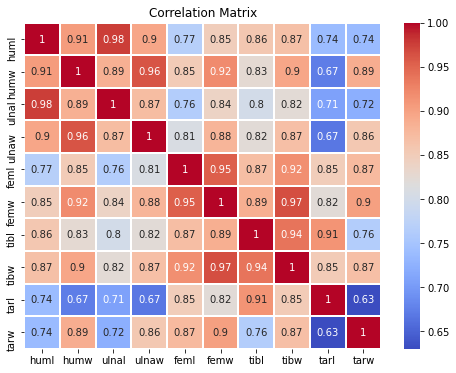

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(X_train.corr(),cmap='coolwarm',annot=True,linewidths=.1)
plt.title('Correlation Matrix')
plt.show()

The heat map again shows how the individual bone measurements are highly correlated. We can try using feature engieering technique of removing the higly correlated features to avoid overfitting. 

The above script will take a threshold value (typicall 85%) to see which featres are highly correlated and can be removed. But in this case we can see from the correlation matrix taht Ulna measures do not play much role in learning of the model so we will just drop ulna measurements.

In [41]:
X_train = X_train.drop({ 'ulnal', 'ulnaw'},axis=1)   # Drop the 2 features of ULNA from train sample

In [42]:
X_test  = X_test.drop({ 'ulnal', 'ulnaw'},axis=1)   # Drop the 2 features of ULNA from test sample  

In [43]:
np.shape(X_train)

(582, 8)

Even trying the abvoe script for threshold value of 95% will not be useful as it reduces the three very important features. This way we would not be left with a good dataset. So we will have to use hyperparameter optimization techniques to reduce the overfitting if it happens.

### Pair plot - to observe the distribution of the data points.

Let us have a look at our data set to see if these models would be applicable to the models of our choice. For this
purpose we can use the pair plot from seaborn library. The pair plot will plot all the features of the data i.e. each bone length and width compared to each other. The pair plot is shown below.

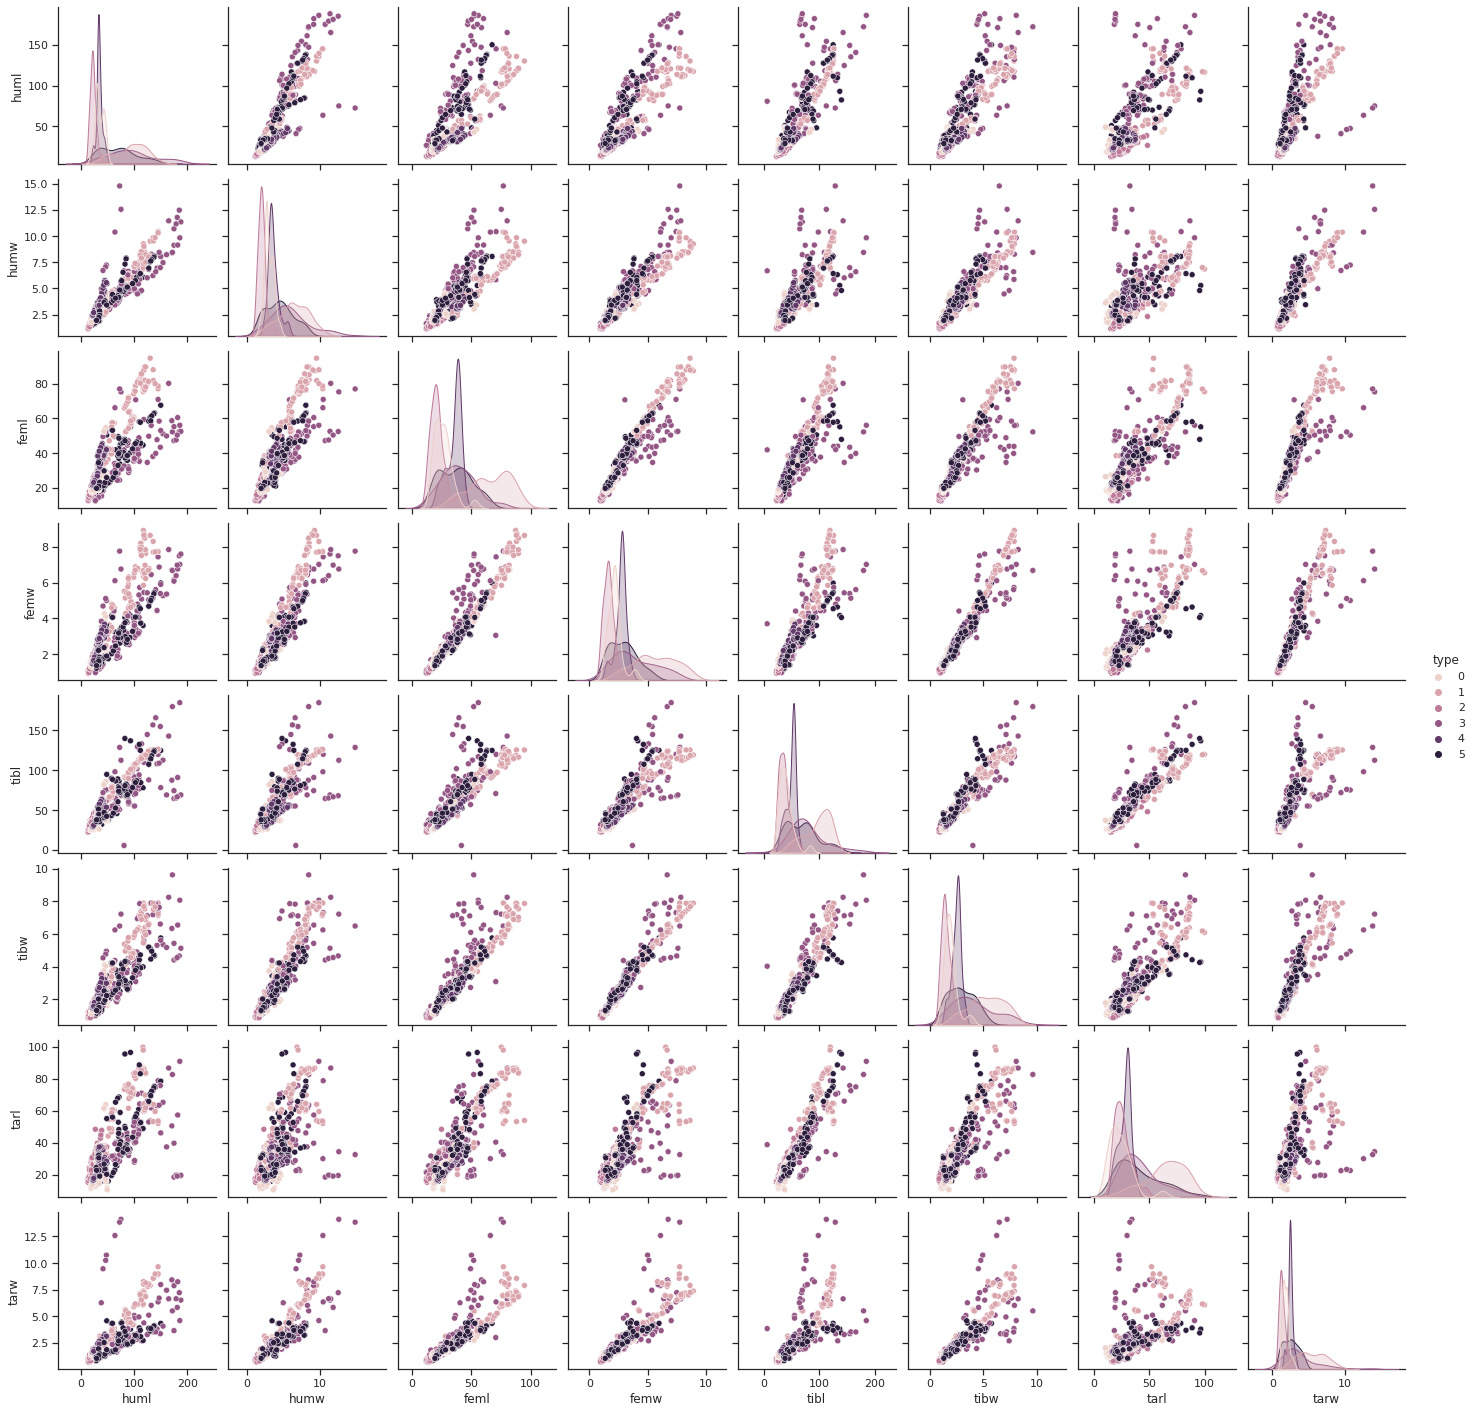

In [44]:
data = X_train.copy(deep = True)
data['type'] = y_train
sns.set_theme(style = "ticks")
sns.pairplot(data, hue = "type")

One of the plots is plotted separately below to have a better view of the distribution.

<AxesSubplot:xlabel='tibl', ylabel='feml'>

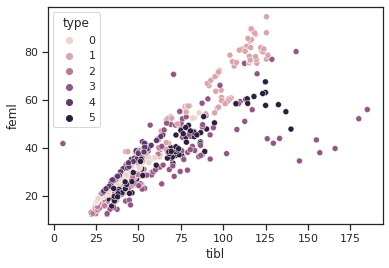

In [45]:
sns.scatterplot(data=data,x='tibl',y='feml',hue='type')

The plot shows each class of bird with an assorted color and compares the length of the femur with the tibia length. From the data we can see that, it is possible to do classification using the logistic regression model on this data set. At first it looks like the classes are too much overlapping but, we have to consider the fact that the one vs. rest method will consider all data points other than one class as a single class at one time and do this process for each class to get the best probability prediction. The other two models will also be able to classify all the classes easily. The SVM is known to work fine in cases where there is apparent overlapping as it will use one vs. one method and the hyper planes created could be in any dimension, as long as it separates the boundary between the two classes. The KNN model will be calculating the distance of close points to the test point in the data. The points are close, suggesting we would be taking a small value of K as the distance between points would be low. One important thing to observe is the trend in the data points for each class. Each bone measurement is highly correlated. We can see that, with increasing length, the width of the bone increases as well. The trend in the bones measurements increases from left to right and the gap in different classes starts to increase. This is extremely helpful in case of logistic regression as it will help in creating the class boundaries.